# Examples on MonteCarlo classes
### 1) Basic Features
 - Simulate paths
 - Summarize results
 - Price options
 - Compute Greeks

In [31]:
from MonteCarlo import GBMSimulation, HestonModelSimulation, JumpDiffusionSimulation

In [32]:
# Define simulation parameters based on Geometric Brownian Motion model
steps = 200  # number of steps
gbm = GBMSimulation(S0=65, rf=0.002, fixed_var=0.15, K=60)  
# Simulate GBM paths and store in dataframe
price_path = gbm.sim_gbm_paths(T=1, steps=steps, Npaths=500)  # return matrix (Npaths x steps+1)
df_price_paths = gbm.store_dataframe(price_path, steps)
df_price_paths.head()

,InitialValue,Step_1,Step_2,Step_3,Step_4,Step_5,Step_6,Step_7,Step_8,Step_9,...,Step_191,Step_192,Step_193,Step_194,Step_195,Step_196,Step_197,Step_198,Step_199,Step_200
0,65,63.819663,63.935666,65.006863,64.307604,62.344813,62.699005,61.317421,62.135986,61.600035,...,56.457085,55.885447,55.234858,55.963683,58.825836,58.036742,57.201572,55.321452,51.890915,53.198616
1,65,66.150415,68.833507,70.125581,69.046842,67.974390,69.361411,69.627013,69.568429,72.614301,...,55.213880,56.228783,55.468130,53.167759,53.734216,53.821893,50.762070,52.457842,53.857756,56.104957
2,65,66.124237,62.767838,61.746540,62.211038,64.594224,63.311564,61.943866,65.418567,68.131240,...,126.047806,124.483220,129.195423,126.889009,127.274657,127.396559,126.989811,124.013845,120.636562,120.354081
3,65,63.974170,64.974718,67.290572,69.932217,70.462212,67.545930,65.393438,62.255043,63.885440,...,48.512087,47.196578,47.262214,48.474836,49.820746,48.332767,46.797737,48.172499,47.621859,47.429939
4,65,64.779099,60.596372,61.653701,57.827985,60.533427,61.249674,61.934548,62.793327,63.467768,...,37.489208,36.958896,37.627856,37.929505,37.082296,36.639120,33.703279,33.444142,34.169454,33.182848


In [33]:
# Summarize MC simulation results
summ_pr = gbm.get_price_paths_summary(price_path, steps)   # Simulation summary for stock price
summ_ret, summ_ret_series = gbm.get_returns_summary(price_path, steps) # Simulation summary for final returns (T-0) and return series
# example: show prices summary
summ_pr

,Values
N_Steps,200
Avg_FinalPrice,66.68425
Max_FinalPrice,203.254065
Min_FinalPrice,24.487123
25_percentile,46.946193
50_percentile,61.830478
75_percentile,79.336889


In [34]:
# MC Pricing and Greeks for European Options
eu_call_price = gbm.EUoptionprice_MC(price_path, T=1, steps=steps, option_type='call')
eu_put_price = gbm.EUoptionprice_MC(price_path, T=1, steps=steps, option_type='put')
# compute MC delta of the option
d_MCcall_gbm = gbm.delta_MC(T=1, steps=steps, Npaths=10000, option_type="call")
d_MCput_gbm = gbm.delta_MC(T=1, steps=steps, Npaths=10000, option_type="put")

print(f"MonteCarlo-GBM EU Call price: {round(eu_call_price, 3)}")
print(f"MonteCarlo-GBM EU Call Delta: {round(d_MCcall_gbm, 3)}")
print(f"MonteCarlo-GBM EU Put price: {round(eu_put_price, 3)}")
print(f"MonteCarlo-GBM EU Put Delta: {round(d_MCput_gbm, 3)}")

MonteCarlo-GBM EU Call price: 13.425
MonteCarlo-GBM EU Call Delta: 0.531
MonteCarlo-GBM EU Put price: 6.754
MonteCarlo-GBM EU Put Delta: -0.305


### 2) Plot results

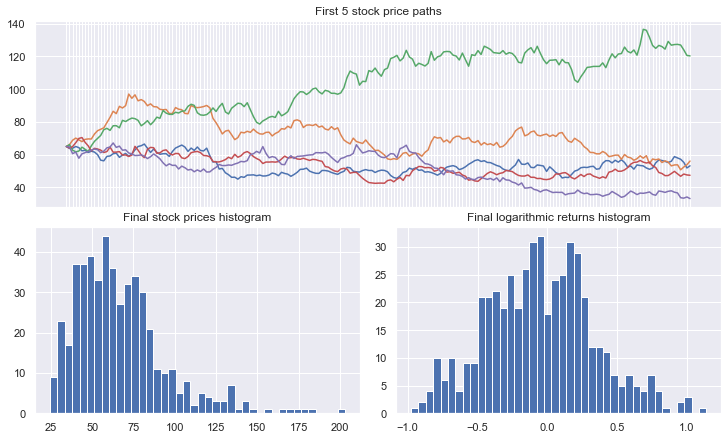

In [35]:
# Plot paths examples and histogram for final price and final returns
# requires paths stored in dataframe
gbm.plot_paths(df_price_paths, steps)

### 3) Compare models

In [41]:
# Heston Model
hms = HestonModelSimulation(S0=65, rf=0.002, fixed_var=0.15, K=60, kappa=4, theta=0.15, v0=0.15, rho=0.9, xi=0.9)
price_paths_hms = hms.sim_heston_paths(T=1, steps=steps, Npaths=500, return_vol=False)  
df_paths_hms = hms.store_dataframe(price_paths_hms, steps)

# Jump diffusion model
jdiff = JumpDiffusionSimulation(S0=65, rf=0.002, fixed_var=0.15, K=60, lam=1, mj=0, vj=0.3)
price_paths_jdiff = jdiff.sim_jumpdiffussion_paths(T=1, steps=steps, Npaths=500)
df_paths_jdiff = hms.store_dataframe(price_paths_jdiff, steps)

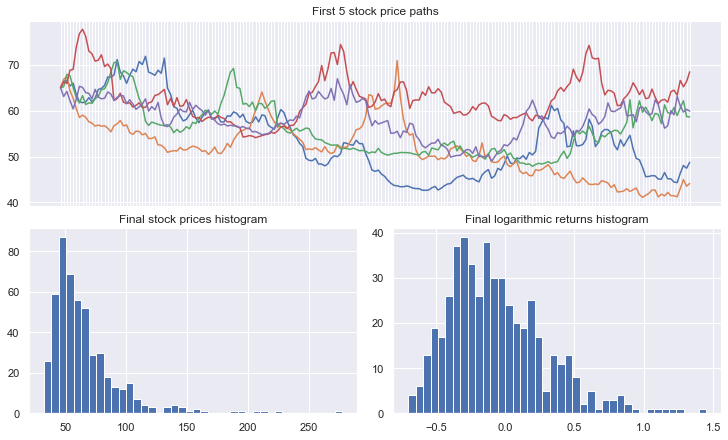

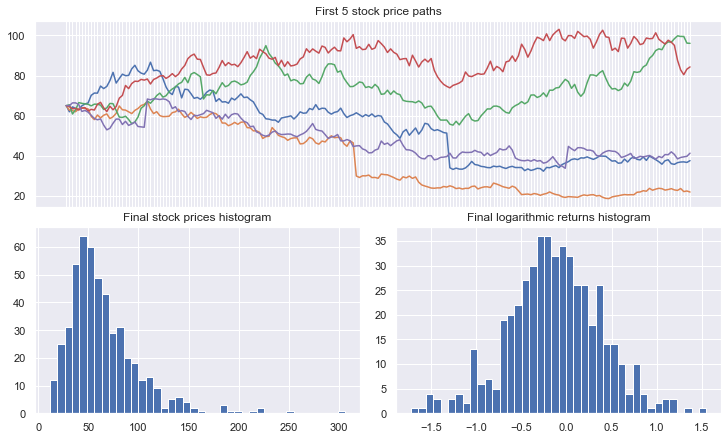

In [42]:
# Plot comparison
hms.plot_paths(df_paths_hms, steps)
jdiff.plot_paths(df_paths_jdiff, steps)

In [44]:
# MC pricing results comparison using summary method (+ comparison with BSM formula)
# returns also greeks summary for BSM formula (_)
summ_gbm, _ = gbm.get_EUoptionpricing_summary(price_path, T=1, steps=steps, Npaths=500)
summ_hms, _ = hms.get_EUoptionpricing_summary(price_paths_hms, T=1, steps=steps, Npaths=500)
summ_jdiff, _ = jdiff.get_EUoptionpricing_summary(price_paths_jdiff, T=1, steps=steps, Npaths=500)
summ_gbm

,Values
BSM_Call_price,12.359074
BSM_Put_price,7.239194
MonteCarlo_Npaths,500.000000
MonteCarlo_Steps,200.000000
MonteCarlo_Call_price,13.425197
MonteCarlo_Put_price,6.754301


In [45]:
summ_hms.loc[["MonteCarlo_Call_price", "MonteCarlo_Put_price"], :]

,Values
MonteCarlo_Call_price,12.006588
MonteCarlo_Put_price,6.536566


In [46]:
summ_jdiff.loc[["MonteCarlo_Call_price", "MonteCarlo_Put_price"], :]

,Values
MonteCarlo_Call_price,14.985362
MonteCarlo_Put_price,10.108754
